March 26th, 2025

## Reduced QLT hot + cold electron whistler anisotropy instability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

# Simulations results

In [3]:
def get_alpha(nc_n0):
    return 0.574 + 0.178*nc_n0 - 0.198*(nc_n0**2)

def get_S(nc_n0):
    return 0.206 - 0.107*nc_n0 - 0.0326*(nc_n0**2)

def get_A(nc_n0, beta_par):
    alpha = get_alpha(nc_n0=nc_n0)
    S = get_S(nc_n0=nc_n0)
    return S/(beta_par**alpha)

In [60]:
list_delta = [0.1, 0.2, 0.5, 0.7, 0.9, 1.0]

In [83]:
np.polyfit(np.log10(data[:, 0]), np.log10(data[:, 1]), deg=1)

array([-0.61870461, -0.80089328])

In [90]:
10**-0.800

0.15848931924611134

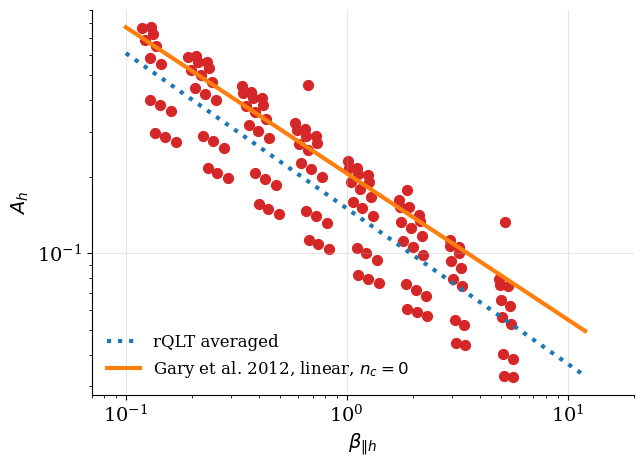

In [92]:
fig, ax = plt.subplots(figsize=(7, 5))


data= np.zeros((126, 2))

kk=0 

for pp, delta in enumerate(list_delta):
    params = np.load("data/ensemble_QLT/delta_" + str(delta) + "/params.npy")
    
    for ii in range(0, 22):
        res = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/y_" + str(ii) + ".npy")
        t = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/t_" + str(ii) + ".npy")
        
        if np.abs(len(t))>100: 
            ax.scatter(res[3, -1]*params[0, 0], res[2, -1]/res[3, -1] -1, marker="o", color='tab:red', s=50)
            data[kk, 0] = res[3, -1]*params[0, 0]
            data[kk, 1] = res[2, -1]/res[3, -1] -1
            kk+= 1

    
ax.plot(np.linspace(1e-1, 12, 1000), 0.15/(np.linspace(1e-1, 12, 1000)**0.61), linewidth=3, c="tab:blue", ls=":", label=r"rQLT averaged")
  
ax.plot(np.linspace(1e-1, 12, 1000), get_A(nc_n0=0, beta_par=np.linspace(1e-1, 12, 1000)), linewidth=3, c="tab:orange", ls="-", label=r"Gary et al. 2012, linear, $n_{c}=0$")

legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='lower left')
legend.get_frame().set_alpha(0)

ax.grid(alpha=0.3)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(7e-2, 2e1)

#ax.set_title("$n_{c}/n_{0} = $" + str(round(1-params[0, 0],1)))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_ = ax.set_xlabel(r"$\beta_{\|h}$")
_ = ax.set_ylabel(r"$A_{h}$")

plt.savefig("figs/gary_2012/A_beta_QLT_all.png", dpi=300, bbox_inches='tight')

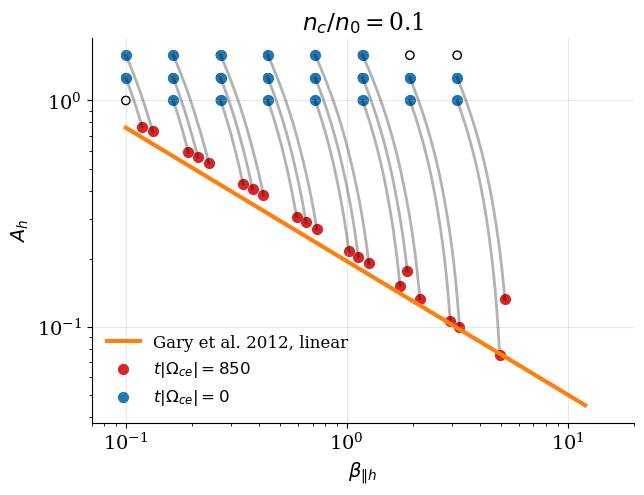

In [59]:
fig, ax = plt.subplots(figsize=(7, 5))

data = np.zeros((500, 2, list_delta))

for pp, delta in enumerate(list_delta):
params = np.load("data/ensemble_QLT/delta_0.9/params.npy")

    ax.scatter(params[:, 2], params[:, 1], marker="o", facecolors='none', edgecolors='k')
    
    for ii in range(0, 22):
        res = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/y_" + str(ii) + ".npy")
        t = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/t_" + str(ii) + ".npy")
        
        if np.abs(len(t))>100: 
            ax.plot(res[3, :]*params[0, 0], res[2, :]/res[3, :] -1, color="black", alpha=0.3, linewidth=2)
            ax.scatter(res[3, 0]*params[0, 0], res[2, 0]/res[3, 0] -1, marker="o", color='tab:blue', s=50)
            ax.scatter(res[3, -1]*params[0, 0], res[2, -1]/res[3, -1] -1, marker="o", color='tab:red', s=50)
    
    ax.plot(np.linspace(1e-1, 12, 1000), get_A(nc_n0=1-params[0, 0], beta_par=np.linspace(1e-1, 12, 1000)), linewidth=3, c="tab:orange", ls="-", label=r"Gary et al. 2012, linear")
    #ax.plot(np.linspace(1e-1, 12, 1000), 0.42/(np.linspace(1e-1, 12, 1000)**0.38), linewidth=3, c="tab:pink", ls="--", label=r"Gary et al. 1996, PIC, $n_{c}=0$")
    
    #ax.plot(np.linspace(1e-1, 12, 1000), get_A(nc_n0=1-params[0, 0], beta_par=np.linspace(1e-1, 12, 1000)), linewidth=3, c="tab:purple", ls=":", label=r"Gary et al. 2012, linear")
    
    ax.scatter(np.nan, np.nan, marker="o", color='tab:red', s=50, label="$t|\Omega_{ce}|=850$")
    ax.scatter(np.nan, np.nan, marker="o", color='tab:blue', s=50, label="$t|\Omega_{ce}|=0$")
    
    legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='lower left')
    legend.get_frame().set_alpha(0)

ax.grid(alpha=0.3)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(7e-2, 2e1)

ax.set_title("$n_{c}/n_{0} = $" + str(round(1-params[0, 0],1)))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_ = ax.set_xlabel(r"$\beta_{\|h}$")
_ = ax.set_ylabel(r"$A_{h}$")

plt.savefig("figs/gary_2012/A_beta_QLT_" + str(round(1-params[0, 0], 2)) + ".png", dpi=300, bbox_inches='tight')

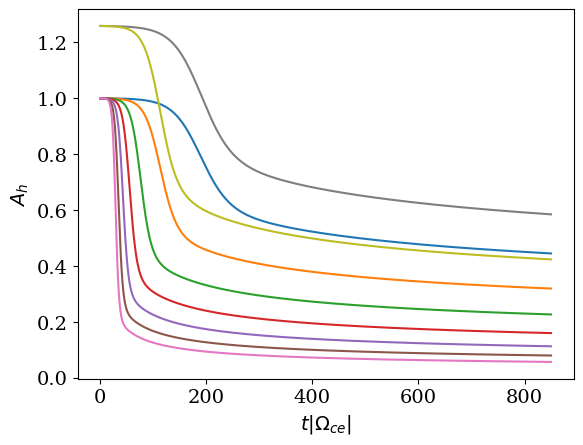

In [51]:
fig, ax = plt.subplots()
for ii in range(0, 10):
        res = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/y_" + str(ii) + ".npy")
        t = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/t_" + str(ii) + ".npy")
        if np.abs(len(t))>100: 
            plt.plot(t, res[2, :]/res[3, :] - 1)
_ = ax.set_ylabel(r"$A_{h}$")
_ = ax.set_xlabel(r"$t|\Omega_{ce}|$")

plt.savefig("figs/gary_2012/A_in_time.png", dpi=300)

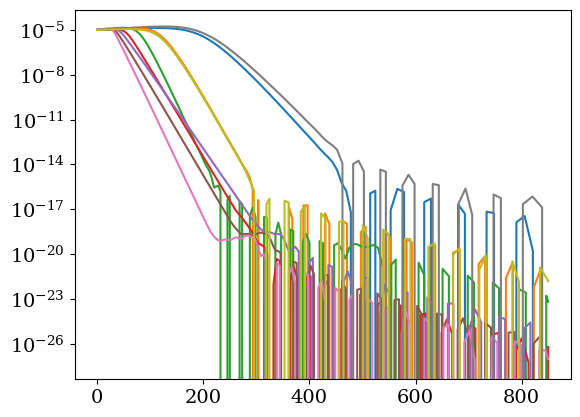

In [48]:
fig, ax = plt.subplots()
for ii in range(0, 10):
        res = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/y_" + str(ii) + ".npy")
        t = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/t_" + str(ii) + ".npy")
        if np.abs(len(t))>100: 
            plt.plot(t, res[-1, :])
plt.yscale("log")